# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [9]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1,1e-3]
EPOCHS = 30
BATCH_SIZE = 256
MOMENTUM = 0.95
optimizers=['SGD','RMSprop','AdaGrad','Adam']

In [12]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    for opt in optimizers:        
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with %s - LR = %.6f" % (opt,lr))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        if opt=='SGD':
            optimizer = keras.optimizers.SGD(lr=lr)
        elif opt=='RMSprop':
            optimizer = keras.optimizers.RMSprop(lr=lr)
        elif opt=='AdaGrad':
            optimizer = keras.optimizers.Adagrad(lr=lr)
        else:
            optimizer = keras.optimizers.Adam(lr=lr)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "exp-%s-lr-%s" % (opt,str(lr))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment with SGD - LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [======================

50000/50000 [==============================] - 3s 63us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 15/30
50000/50000 [==============================] - 3s 65us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 16/30
50000/50000 [==============================] - 3s 64us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 17/30
50000/50000 [==============================] - 3s 67us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 18/30
50000/50000 [==============================] - 3s 64us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 19/30
50000/50000 [==============================] - 3s 61us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 20/30
50000/50000 [==============================] - 3s 64us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 21/30
50000/50000 [=======

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 4s 77us/step - loss: 14.4438 - acc: 0.0999 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/30
50000/50000 [==============================] - 3s 69us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/30
50000/50000 [==============================] - 4s 74us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/30
50000/50000 [==============================] - 3s 69us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/30
50000/50000 [==============================] - 4s 73us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/30
50000/50000 [==============================] - 3s 67us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/30
50000/50000 [==============================] - 3s 63us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.

Epoch 22/30
50000/50000 [==============================] - 3s 59us/step - loss: 1.8059 - acc: 0.3706 - val_loss: 1.8018 - val_acc: 0.3708
Epoch 23/30
50000/50000 [==============================] - 3s 61us/step - loss: 1.7996 - acc: 0.3740 - val_loss: 1.7952 - val_acc: 0.3729
Epoch 24/30
50000/50000 [==============================] - 3s 59us/step - loss: 1.7935 - acc: 0.3750 - val_loss: 1.7906 - val_acc: 0.3730
Epoch 25/30
50000/50000 [==============================] - 3s 58us/step - loss: 1.7877 - acc: 0.3776 - val_loss: 1.7844 - val_acc: 0.3760
Epoch 26/30
50000/50000 [==============================] - 3s 60us/step - loss: 1.7819 - acc: 0.3799 - val_loss: 1.7812 - val_acc: 0.3759
Epoch 27/30
50000/50000 [==============================] - 3s 56us/step - loss: 1.7767 - acc: 0.3817 - val_loss: 1.7736 - val_acc: 0.3809
Epoch 28/30
50000/50000 [==============================] - 3s 58us/step - loss: 1.7712 - acc: 0.3844 - val_loss: 1.7686 - val_acc: 0.3834
Epoch 29/30
50000/50000 [=========

50000/50000 [==============================] - 3s 65us/step - loss: 1.6504 - acc: 0.4224 - val_loss: 1.6826 - val_acc: 0.3960
Epoch 6/30
50000/50000 [==============================] - 3s 66us/step - loss: 1.6228 - acc: 0.4284 - val_loss: 1.6176 - val_acc: 0.4305
Epoch 7/30
50000/50000 [==============================] - 4s 73us/step - loss: 1.5998 - acc: 0.4383 - val_loss: 1.5995 - val_acc: 0.4389
Epoch 8/30
50000/50000 [==============================] - 3s 69us/step - loss: 1.5778 - acc: 0.4455 - val_loss: 1.6038 - val_acc: 0.4336
Epoch 9/30
50000/50000 [==============================] - 3s 62us/step - loss: 1.5599 - acc: 0.4543 - val_loss: 1.5844 - val_acc: 0.4426
Epoch 10/30
50000/50000 [==============================] - 3s 68us/step - loss: 1.5447 - acc: 0.4591 - val_loss: 1.5727 - val_acc: 0.4437
Epoch 11/30
50000/50000 [==============================] - 3s 64us/step - loss: 1.5298 - acc: 0.4625 - val_loss: 1.5671 - val_acc: 0.4499
Epoch 12/30
50000/50000 [=========================

50000/50000 [==============================] - 3s 69us/step - loss: 1.0164 - acc: 0.6373 - val_loss: 1.3887 - val_acc: 0.5333
Epoch 27/30
50000/50000 [==============================] - 3s 67us/step - loss: 1.0092 - acc: 0.6391 - val_loss: 1.4364 - val_acc: 0.5212
Epoch 28/30
50000/50000 [==============================] - 3s 66us/step - loss: 0.9972 - acc: 0.6453 - val_loss: 1.4101 - val_acc: 0.5269
Epoch 29/30
50000/50000 [==============================] - 3s 65us/step - loss: 0.9763 - acc: 0.6508 - val_loss: 1.4302 - val_acc: 0.5213
Epoch 30/30
50000/50000 [==============================] - 3s 69us/step - loss: 0.9528 - acc: 0.6613 - val_loss: 1.4343 - val_acc: 0.5280


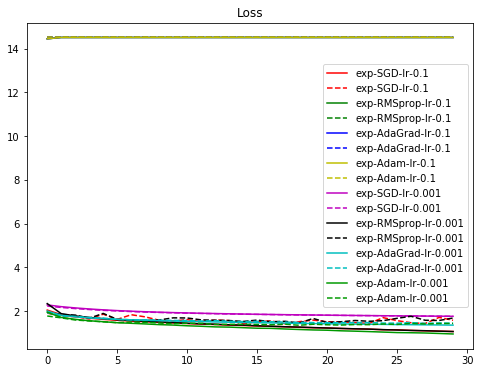

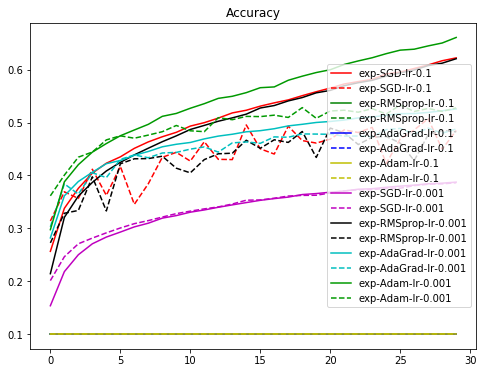

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k","c","#009900"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()